In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as sc

In [106]:
swift_data = pd.read_csv('swift_data.csv', sep='\t')

In [107]:
plfits = pd.read_table('best_model.txt', sep ='|', header = None)
plfits.columns = ['GRB Name', 'Trigger ID', 'Best-fit GRB spectrum model']
plfits = plfits.drop(columns = ['Trigger ID'])
plfits['GRB Name'] = plfits['GRB Name'].str.strip()
plfits['Best-fit GRB spectrum model'] = plfits['Best-fit GRB spectrum model'].str.strip()

In [108]:
swift_pl = pd.merge(swift_data, plfits)
#ordering data by whether or not it is best fit by simple power law, cut-off powerlaw or not applicable
swift_pl = swift_pl.sort_values(by=['Best-fit GRB spectrum model'])

In [109]:
# makes a dataframe with GRBs which have CPl best fit models
cpl_grbs = swift_pl.loc[(swift_pl['Best-fit GRB spectrum model'] == 'CPL')]
cpl_grbs.to_csv('cpl.csv', index=False)
# makes a dataframe with GRBs which have PL best fit models
pl_grbs = swift_pl.loc[(swift_pl['Best-fit GRB spectrum model'] == 'PL')]
pl_grbs.to_csv('pl.csv', index=False)

In [26]:
# processing table
pl_parameters = pd.read_table('power_law_pars.txt', sep ='|')
pl_parameters= pl_parameters.drop(columns=[' Trig_ID ',' norm ',' norm_low ',' norm_hi ',' chi2 ',' dof ', ' reduced_chi2 ',
 ' null_prob ',' enorm ',' Exposure_time ',' Spectrum_start ',' Spectrum_stop ',' comment'])
pl_parameters = pl_parameters.rename(columns=lambda x: x.strip())
pl_parameters['GRBname'] = pl_parameters['GRBname'].str.strip()
pl_parameters.rename(columns = {'GRBname':'GRB Name'}, inplace=True)

In [27]:
# processing table
cpl_parameters = pd.read_table('cpl_pars.txt', sep='|')
cpl_parameters = cpl_parameters.drop(columns = [ ' Trig_ID ', ' norm ', ' norm_low ',
       ' norm_hi ', ' chi2 ', ' dof ', ' reduced_chi2 ', ' null_prob ',
       ' enorm ', ' Exposure_time ', ' Spectrum_start ', ' Spectrum_stop ',' comment'])
cpl_parameters = cpl_parameters.rename(columns=lambda x: x.strip())
cpl_parameters['GRB name'] = cpl_parameters['GRB name'].str.strip()
cpl_parameters.rename(columns={'GRB name':'GRB Name'}, inplace=True)

In [28]:
cpl_grbs = pd.merge(cpl_grbs, cpl_parameters)
pl_grbs = pd.merge(pl_grbs, pl_parameters)

In [36]:
cpl_grbs = cpl_grbs.astype({'alpha':'float64','alpha_low':'float64', 'alpha_hi':'float64', 'Epeak':'float64', 
                                        'Epeak_low':'float64', 'Epeak_hi':'float64'})

pl_grbs = pl_grbs.replace('N/A', np.nan)
pl_grbs = pl_grbs.astype({'alpha':'float64','alpha_low':'float64', 'alpha_hi':'float64'})

In [75]:
# make distribution of alpha (for models better fit by PL model) against z, with separation between LGRBs and SGRBs
LGRBs = pl_grbs.loc[(pl_grbs['T90']> 2)]
SGRBs = pl_grbs.loc[(pl_grbs['T90'] < 2)]

error_bar_long = [list(LGRBs.alpha_low), list(LGRBs.alpha_hi)]
error_bar_short = [list(SGRBs.alpha_low), list(SGRBs.alpha_hi)]

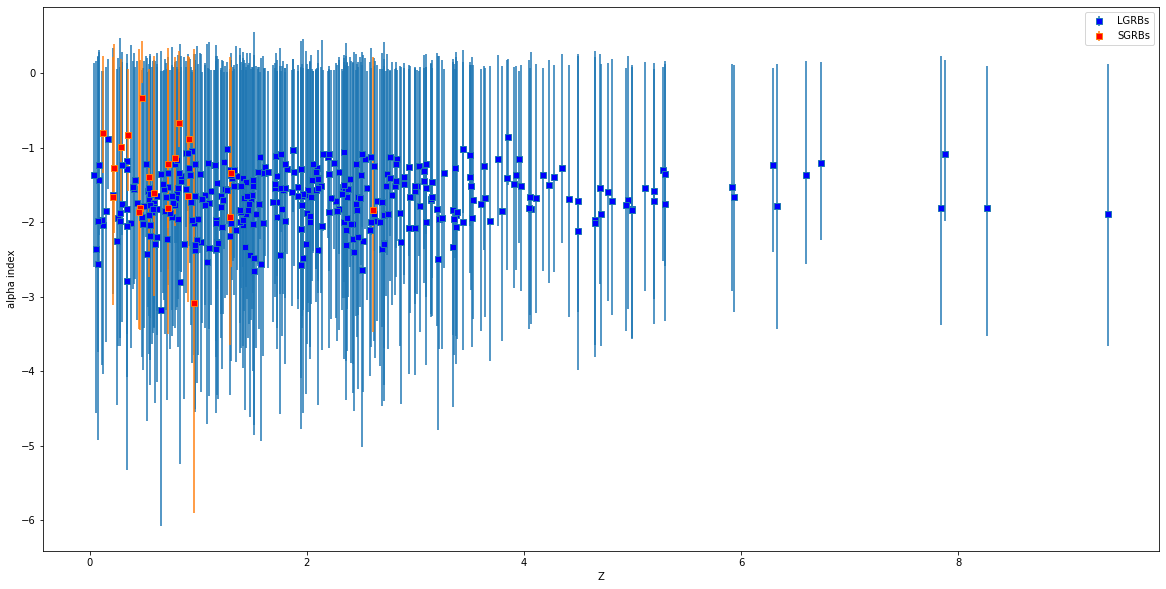

In [80]:
plt.figure(figsize=(20,10)) #sets figure size
x = LGRBs.z
y = LGRBs.alpha
xI = SGRBs.z
yI = SGRBs.alpha
plt.errorbar(x, y, yerr= error_bar_long,marker='s', mfc= 'blue',linestyle= '' )
plt.errorbar(xI, yI, yerr= error_bar_short, marker='s', mfc='red',linestyle= '')
plt.legend(['LGRBs', 'SGRBs']) 
plt.ylabel('alpha index')
plt.xlabel('Z')

plt.show()

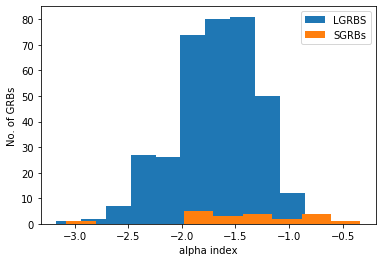

In [95]:
plt.hist(LGRBs.alpha)
plt.hist(SGRBs.alpha)
plt.ylabel('No. of GRBs')
plt.xlabel('alpha index')
plt.legend(['LGRBS', 'SGRBs'])
plt.show()

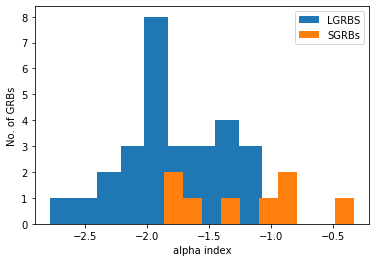

In [92]:
LGRBs_lowz = LGRBs.loc[(LGRBs['z'] < 0.5 )]
SGRBs_lowz = SGRBs.loc[(SGRBs['z'] < 0.5)]

#plotting histogram of low z LGRBs and SGRBs in terms of alpha index for simple power law case

plt.hist(LGRBs_lowz.alpha)
plt.hist(SGRBs_lowz.alpha)
plt.ylabel('No. of GRBs')
plt.xlabel('alpha index')
plt.legend(['LGRBS', 'SGRBs'])
plt.show()

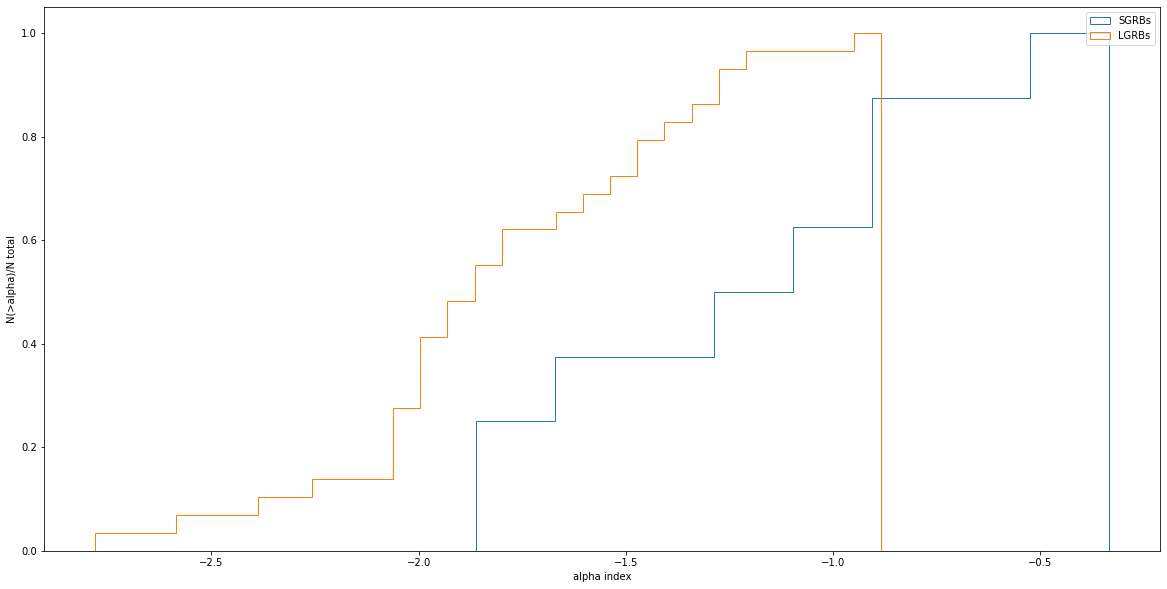

In [98]:
plt.figure(figsize=(20,10)) #sets figure size

n, bins, patches = plt.hist(SGRBs_lowz.alpha, len(SGRBs_lowz), density=True, histtype='step',
                           cumulative = True, label='Empirical')
m, bins, patches = plt.hist(LGRBs_lowz.alpha, len(LGRBs_lowz), density=True, histtype='step',
                           cumulative = True, label='Empirical')
plt.xlabel('alpha index')
plt.ylabel('N(>alpha)/N total')
plt.legend(['SGRBs', 'LGRBs'])
plt.show()